# Run AR6-fair for scenario ssp 2-45 the same scenario as used in the Methane pledges article on the carbon brief:

https://www.carbonbrief.org/guest-post-the-global-methane-pledge-needs-to-go-further-to-help-limit-warming-to-1-5c/

I also included ssp370 in here too for interest.

In [52]:
import fair
import matplotlib.pyplot as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.interpolate import interp1d
from multiprocessing import Pool
from tqdm import tqdm
import json
import pickle
#from climateforcing.twolayermodel import TwoLayerModel
from climateforcing.utils import check_and_download, mkdir_p

In [53]:
# set up plotting
pl.rcParams['figure.figsize'] = (9/2.54, 9/2.54)
pl.rcParams['font.size'] = 12
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['ytick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.major.left'] = True
pl.rcParams['ytick.major.right'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['ytick.right'] = True

In [54]:
# Download FaIR params set
check_and_download(
    'https://zenodo.org/record/5513022/files/fair-1.6.2-wg3-params.json', 
    '../data_input/fair_ar6/'
)

In [55]:
with open('../data_input/fair_ar6/fair-1.6.2-wg3-params.json') as f:
    config_list = json.load(f)

In [56]:
len(config_list)

2237

In [57]:
#scenarios = ['constant_forcing', 'constant_emissions', 'zero', 'scenario', 'infrastructure']
#scenarios = ['constant_emissions', 'zero', 'infrastructure', 'scenario']
# zero and constant emissions will be the easy ones, so start with these.



In [58]:
# Download RCMIP emissions
check_and_download(
    'https://zenodo.org/record/4589756/files/rcmip-emissions-annual-means-v5-1-0.csv', 
    '../data_input/rcmip/'
)

In [59]:
# Download illustrative pathways
AR6Pathways = pd.read_csv(
    '/home/h02/hadcam/github/IllusPathwaysAR6/IllusPathsAR6_plushistRCMIP.csv')
    #20210928_ar6emissions_harmonized_infilled_c1_c3_IPs_plus_c2.csv')


RCMIPhist_data = pd.read_csv('/home/h02/hadcam/github/IllusPathwaysAR6/plushistRCMIP.csv')

plushist = pd.read_csv('/home/h02/hadcam/github/IllusPathwaysAR6/plushistRCMIP.csv')
plushist_long = pd.melt(plushist, id_vars=['Model', 'Scenario', 'Region', 'Variable', 'Unit', 'Mip_Era', 'Activity_Id'], var_name='Year')
rcmip_ar6 = pd.read_csv('/home/h02/hadcam/github/IllusPathwaysAR6/IllusPathsAR6_plushistRCMIP.csv')
rcmip_ar6_long = pd.melt(rcmip_ar6, id_vars=['Model', 'Scenario', 'Region', 'Variable', 'Unit'], var_name='Year')
plushist_long.drop(columns=['Mip_Era', 'Activity_Id'], inplace=True)
rcmip_alldata = pd.concat([plushist_long, rcmip_ar6_long])

#sns.relplot(data=rcmip_alldata, x='Year', y='value', hue='Model')
#g = sns.relplot(data=rcmip_alldata, x='Year', y='value', hue='Model')

#rcmip_alldata.to_csv('/home/h02/hadcam/github/IllusPathwaysAR6/AR6Ilusplus_RCMIPhist.csv')

In [60]:
new = pd.DataFrame.stack(rcmip_alldata)
new.to_csv('/home/h02/hadcam/github/IllusPathwaysAR6/AR6Ilusplus_RCMIPhist_wide.csv')

#rcmip_data_wide.to_csv('/home/h02/hadcam/github/IllusPathwaysAR6/AR6Ilusplus_RCMIPhist.csv')

In [13]:
# Download illustrative pathways
illuspd = pd.read_csv(
    '/home/h02/hadcam/github/IllusPathwaysAR6/20210928_ar6emissions_harmonized_infilled_c1_c3_IPs_plus_c2.csv')


ssp_df= 
years = np.arange(1750, 2111)
startyear = 1750
first_scenyear = 2015
last_scenyear = 2110
first_row = int(first_scenyear-startyear)
last_row = int(last_scenyear-startyear)


species = [  # in fair 1.6, order is important
    '|CO2|MAGICC Fossil and Industrial',
    '|CO2|MAGICC AFOLU',
    '|CH4',
    '|N2O',
    '|Sulfur',
    '|CO',
    '|VOC',
    '|NOx',
    '|BC',
    '|OC',
    '|NH3',
    '|CF4',
    '|C2F6',
    '|C6F14',
    '|HFC23',
    '|HFC32',
    '|HFC4310mee',
    '|HFC125',
    '|HFC134a',
    '|HFC143a',
    '|HFC227ea',
    '|HFC245fa',
    '|SF6',
    '|CFC11',
    '|CFC12',
    '|CFC113',
    '|CFC114',
    '|CFC115',
    '|CCl4',
    '|CH3CCl3',
    '|HCFC22',
    '|HCFC141b',
    '|HCFC142b',
    '|Halon1211',
    '|Halon1202',
    '|Halon1301',
    '|Halon2402',
    '|CH3Br',
    '|CH3Cl',
]

# Assume that units coming out of aneris don't change. One day I'll do unit parsing
unit_convert = np.ones(40)
unit_convert[1] = 12/44/1000
unit_convert[2] = 12/44/1000
unit_convert[4] = 28/44/1000
unit_convert[5] = 32/64
unit_convert[8] = 14/46

data_out = {}
# 'ssp119','ssp126','ssp245','ssp370',ssp434','ssp585''

for scenario in scenarios:
    data_out[scenario] = np.ones((361, 40)) * np.nan
    data_out[scenario][:,0] = years
    print(scenario)
    years_future = [2015] + list(range(2020,2111,10))
    for i, specie in enumerate(species):
        
        data_out[scenario][:first_row,i+1] = ssp_df.loc[(ssp_df['Region']=='World')&(ssp_df['Scenario']==scenario)&(ssp_df['Variable'].str.endswith(specie)),str(startyear):'2014']*unit_convert[i+1]
        f = interp1d(years_future, ssp_df.loc[(ssp_df['Region']=='World')&(ssp_df['Scenario']==scenario)&(ssp_df['Variable'].str.endswith(specie)),'2015':'2110'].dropna(axis=1))
        data_out[scenario][first_row:(last_row+1), i+1] = f(np.arange(first_scenyear, last_scenyear+1))*unit_convert[i+1]


,Model,Scenario,Region,Variable,Unit,2015,2016,2017,2018,2019,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AIM/CGE 2.2,EN_NPi2020_900f,World,AR6 climate diagnostics|Infilled|Emissions|BC,Mt BC/yr,9.727424,9.606628,9.486308,9.366464,9.247097,...,2.752760,2.737820,2.722880,2.707940,2.693000,2.679640,2.666280,2.652920,2.639560,2.626200
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AIM/CGE 2.2,EN_NPi2020_900f,World,AR6 climate diagnostics|Infilled|Emissions|CCl4,kt CCl4/yr,47.547600,45.018546,42.482563,39.953508,37.424454,...,0.437632,0.416363,0.395037,0.373768,0.352500,0.331232,0.309905,0.288637,0.267368,0.246100
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,COFFEE 1.1,EN_INDCi2030_500f,World,AR6 climate diagnostics|Infilled|Emissions|SO2F2,kt SO2F2/yr,2.531700,2.613054,2.694631,2.775986,2.857340,...,0.267860,0.262030,0.256185,0.250355,0.244526,0.238696,0.232851,0.227021,0.221192,0.215362
828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829,COFFEE 1.1,EN_INDCi2030_500f,World,AR6 climate diagnostics|Infilled|Emissions|Sulfur,Mt SO2/yr,100.771167,99.657241,98.535814,97.406886,96.270457,...,13.424083,13.192234,12.960384,12.728535,12.496685,12.264836,12.032986,11.801137,11.569287,11.337438
830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ssp_df = pd.read_csv('../data_input/rcmip/rcmip-emissions-annual-means-v5-1-0.csv')
years = np.arange(1750, 2111)

startyear = 1750
first_scenyear = 2015
last_scenyear = 2110
first_row = int(first_scenyear-startyear)
last_row = int(last_scenyear-startyear)

species = [  # in fair 1.6, order is important
    '|CO2|MAGICC Fossil and Industrial',
    '|CO2|MAGICC AFOLU',
    '|CH4',
    '|N2O',
    '|Sulfur',
    '|CO',
    '|VOC',
    '|NOx',
    '|BC',
    '|OC',
    '|NH3',
    '|CF4',
    '|C2F6',
    '|C6F14',
    '|HFC23',
    '|HFC32',
    '|HFC4310mee',
    '|HFC125',
    '|HFC134a',
    '|HFC143a',
    '|HFC227ea',
    '|HFC245fa',
    '|SF6',
    '|CFC11',
    '|CFC12',
    '|CFC113',
    '|CFC114',
    '|CFC115',
    '|CCl4',
    '|CH3CCl3',
    '|HCFC22',
    '|HCFC141b',
    '|HCFC142b',
    '|Halon1211',
    '|Halon1202',
    '|Halon1301',
    '|Halon2402',
    '|CH3Br',
    '|CH3Cl',
]

# Assume that units coming out of aneris don't change. One day I'll do unit parsing
unit_convert = np.ones(40)
unit_convert[1] = 12/44/1000
unit_convert[2] = 12/44/1000
unit_convert[4] = 28/44/1000
unit_convert[5] = 32/64
unit_convert[8] = 14/46

data_out = {}
# 'ssp119','ssp126','ssp245','ssp370',ssp434','ssp585''

for scenario in scenarios:
    data_out[scenario] = np.ones((361, 40)) * np.nan
    data_out[scenario][:,0] = years
    print(scenario)
    years_future = [2015] + list(range(2020,2111,10))
    for i, specie in enumerate(species):
        
        data_out[scenario][:first_row,i+1] = ssp_df.loc[(ssp_df['Region']=='World')&(ssp_df['Scenario']==scenario)&(ssp_df['Variable'].str.endswith(specie)),str(startyear):'2014']*unit_convert[i+1]
        f = interp1d(years_future, ssp_df.loc[(ssp_df['Region']=='World')&(ssp_df['Scenario']==scenario)&(ssp_df['Variable'].str.endswith(specie)),'2015':'2110'].dropna(axis=1))
        data_out[scenario][first_row:(last_row+1), i+1] = f(np.arange(first_scenyear, last_scenyear+1))*unit_convert[i+1]

ssp245
ssp370


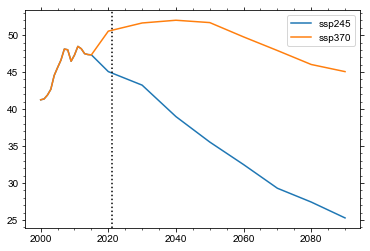

In [9]:

pl.plot(np.arange(2000, 2091), data_out['ssp245'][250:341,8], label='ssp245')
pl.plot(np.arange(2000, 2091), data_out['ssp370'][250:341,8], label='ssp370')
pl.axvline(2021, ls=':', color='k')
pl.legend()

# SSP245

In [10]:
results_out = {}

In [11]:
updated_config = []
for i, cfg in enumerate(config_list):
    updated_config.append({})
    for key, value in cfg.items():
        if isinstance(value, list):
            updated_config[i][key] = np.asarray(value)
        else:
            updated_config[i][key] = value
    updated_config[i]['emissions'] = data_out['ssp245']
    updated_config[i]['diagnostics'] = 'AR6'
    updated_config[i]["efficacy"] = np.ones(45)
    updated_config[i]["gir_carbon_cycle"] = True
    updated_config[i]["temperature_function"] = "Geoffroy"
    updated_config[i]["aerosol_forcing"] = "aerocom+ghan2"
    updated_config[i]["fixPre1850RCP"] = False
    updated_config[i]["scale"][43] = 0.6

In [12]:
def run_fair(args):
    thisC, thisF, thisT, _, thisOHU, _, thisAF = fair.forward.fair_scm(**args)
    return (thisC[:,0], thisT, np.sum(thisF[:,:43], axis=1), np.sum(thisF[:,35:41], axis=1), np.sum(thisF, axis=1))

if __name__ == '__main__':
    with Pool(28) as pool:
        result = list(tqdm(pool.imap(run_fair, updated_config), total=len(updated_config)))

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 2237/2237 [01:09<00:00, 32.00it/s]


In [13]:
len(result[0])

5

In [14]:
len(updated_config)

2237

In [15]:
result_t = np.array(result).transpose(1,2,0)

In [16]:
results_out['ssp245'] = {}
c, t, f_ant, f_aer, f_tot = result_t
temp_rebase = t - t[100:151,:].mean(axis=0)
results_out['ssp245']['co2_conc'] = c
results_out['ssp245']['temp'] = temp_rebase
results_out['ssp245']['F_ant'] = f_ant
results_out['ssp245']['F_aer'] = f_aer
results_out['ssp245']['F_tot'] = f_tot

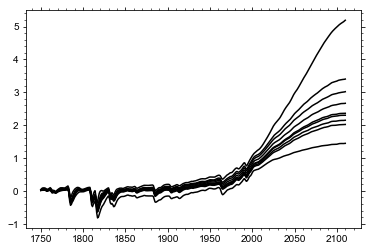

In [17]:
#temp_df = pd.read_csv('../data_input/observations/temp.csv', index_col=0)
#temp_df

for perc in [0,5,10,20,25,50,75,90,100]:
    pl.plot(np.arange(1750,2111),np.percentile(t,perc, axis=1), color='k')


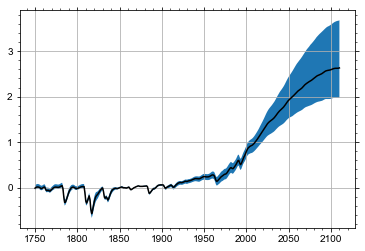

In [18]:
pl.fill_between(np.arange(1750,2111), np.percentile(results_out['ssp245']['temp'], 5, axis=1), np.percentile(results_out['ssp245']['temp'], 95, axis=1))
pl.plot(np.arange(1750,2111), np.percentile(results_out['ssp245']['temp'], 50, axis=1), color='k')
#pl.plot(temp_df.index, temp_df.temp, color='r')
#pl.ylim(0.0, 1.7)
#pl.xlim(1950, 2030)
pl.grid()

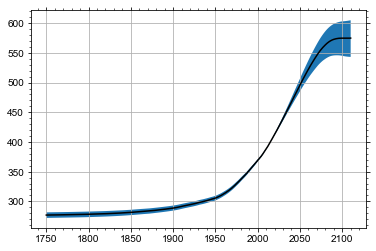

In [19]:
pl.fill_between(np.arange(1750,2111), np.percentile(results_out['ssp245']['co2_conc'], 5, axis=1), np.percentile(results_out['ssp245']['co2_conc'], 95, axis=1))
pl.plot(np.arange(1750,2111), np.percentile(results_out['ssp245']['co2_conc'], 50, axis=1), color='k')
#pl.plot(temp_df.index, temp_df.temp, color='r')
#pl.ylim(0.0, 1.7)
#pl.xlim(1950, 2030)
pl.grid()

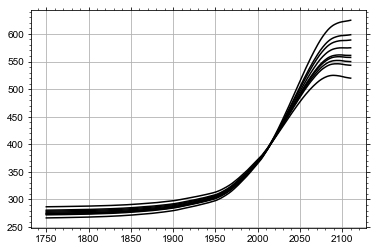

In [20]:
for perc in [0,5,10,20,25,50,75,90,100]:
    pl.plot(np.arange(1750,2111),np.percentile(c,perc, axis=1), color='k')
pl.grid()

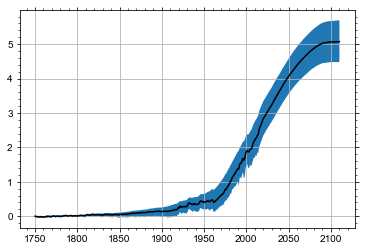

In [21]:
pl.fill_between(np.arange(1750,2111), np.percentile(f_ant, 5, axis=1), np.percentile(f_ant, 95, axis=1))
pl.plot(np.arange(1750,2111), np.percentile(f_ant, 50, axis=1), color='k')
pl.grid()

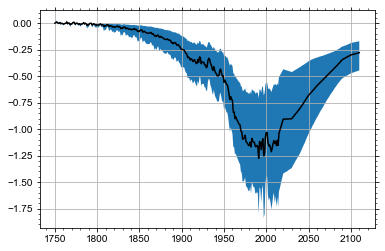

In [22]:
pl.fill_between(np.arange(1750,2111), np.percentile(f_aer, 5, axis=1), np.percentile(f_aer, 95, axis=1))
pl.plot(np.arange(1750,2111), np.percentile(f_aer, 50, axis=1), color='k')
pl.grid()

In [23]:
np.median(results_out['ssp245']['temp'], axis=1)[245:265].mean()

0.8748613261828051

In [24]:
# aerosol forcing is a little less negative than in WG3 because we use CEDS-updated not SSP historical
print(
    np.percentile(results_out['ssp245']['F_aer'], 5, axis=1)[255:265].mean(),
    np.percentile(results_out['ssp245']['F_aer'], 50, axis=1)[255:265].mean(),
    np.percentile(results_out['ssp245']['F_aer'], 95, axis=1)[255:265].mean()
)

-1.682424405229133 -1.1481288262800748 -0.5985614310021965


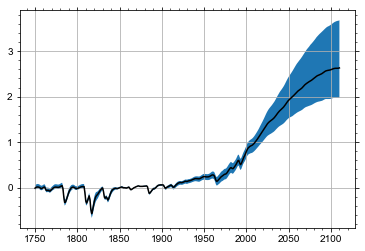

In [25]:
pl.fill_between(np.arange(1750,2111), np.percentile(results_out['ssp245']['temp'], 5, axis=1), np.percentile(results_out['ssp245']['temp'], 95, axis=1))
pl.plot(np.arange(1750,2111), np.percentile(results_out['ssp245']['temp'], 50, axis=1), color='k')
#pl.plot(temp_df.index, temp_df.temp, color='r')
#pl.ylim(0.0, 1.7)
#pl.xlim(1950, 2030)
pl.grid()

# ssp370

In [26]:
for i, cfg in enumerate(updated_config):
    updated_config[i]['emissions'] = data_out['ssp370']

In [27]:
if __name__ == '__main__':
    with Pool(28) as pool:
        result = list(tqdm(pool.imap(run_fair, updated_config), total=len(updated_config)))

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 2237/2237 [01:09<00:00, 32.34it/s]


In [28]:
results_out['ssp370'] = {}
result_t = np.array(result).transpose(1,2,0)
c, t, f_ant, f_aer, f_tot = result_t
temp_rebase = t - t[100:151,:].mean(axis=0)
results_out['ssp370']['co2_conc'] = c
results_out['ssp370']['temp'] = temp_rebase
results_out['ssp370']['F_ant'] = f_ant
results_out['ssp370']['F_aer'] = f_aer
results_out['ssp370']['F_tot'] = f_tot

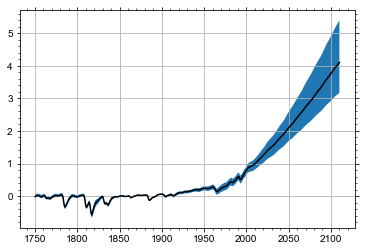

In [29]:
pl.fill_between(np.arange(1750,2111), np.percentile(results_out['ssp370']['temp'], 5, axis=1), np.percentile(results_out['ssp370']['temp'], 95, axis=1))
pl.plot(np.arange(1750,2111), np.percentile(results_out['ssp370']['temp'], 50, axis=1), color='k')
#pl.plot(temp_df.index, temp_df.temp, color='r')
pl.grid()

# All on the same plot!

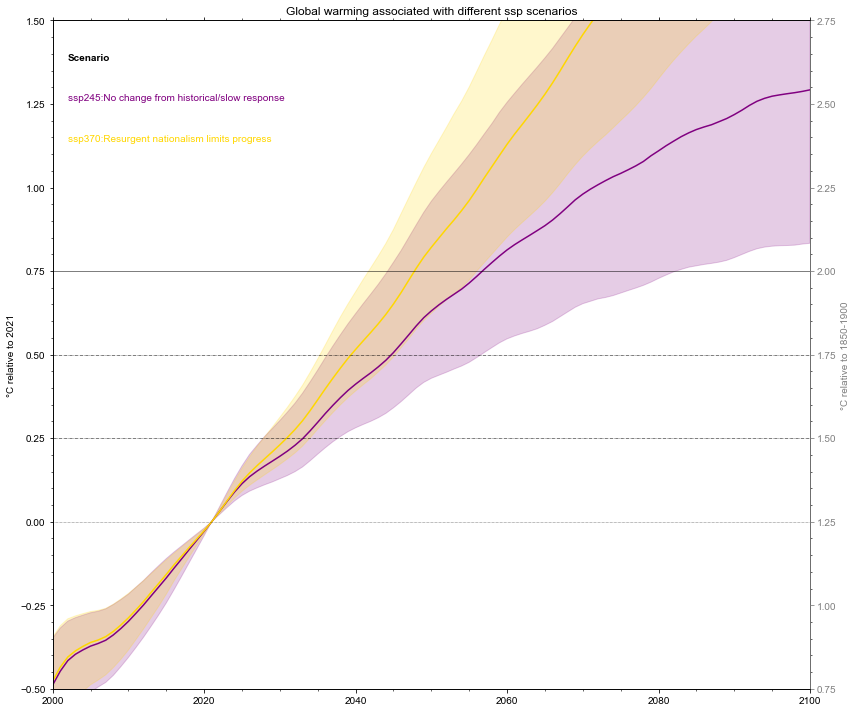

In [30]:
#scenarios = ['zero', 'constant_forcing', 'constant_emissions', 'infrastructure', 'scenario']
scenarios = ['ssp119',  'ssp126', 'ssp245', 'ssp370', 'ssp434', 'ssp585']
colors = {
    'ssp119' : 'green',
    'ssp126' : 'blue',
    'ssp245' : 'purple',
    'ssp370' : 'gold',
    'ssp434' : 'orange',
    'ssp585' : 'red'
    }

labels = {
    'ssp119' : 'ssp119:Sustainable scenario 1',
    'ssp126' : 'ssp126:Sustainable scenario 2',
    'ssp245' : 'ssp245:No change from historical/slow response',
    'ssp370' : 'ssp370:Resurgent nationalism limits progress',
    'ssp434' : 'ssp434:Uneven and slow response',
    'ssp585' : 'ssp585:Fossil-Fueled Development'
}

fig, ax = pl.subplots(figsize=(12, 10))

ax.text(0.02, 0.94, 'Scenario', fontweight='bold', fontsize=10, transform=ax.transAxes)
for i, scenario in enumerate(['ssp245','ssp370']):
    if scenario in ['ssp245', 'ssp370']:
        ax.fill_between(np.arange(2000,2101), np.percentile(results_out[scenario]['temp'][250:351,:] - results_out[scenario]['temp'][271,:], 5, axis=1), np.percentile(results_out[scenario]['temp'][250:351,:] - results_out[scenario]['temp'][271,:], 95, axis=1), color=colors[scenario], alpha=0.2)
    ax.plot(np.arange(2000, 2101), np.median(results_out[scenario]['temp'][250:351,:] - results_out[scenario]['temp'][271,:], axis=1), color=colors[scenario], label=labels[scenario])
    ax.text(0.02, 0.88-0.06*i, labels[scenario], color=colors[scenario], transform=ax.transAxes, fontsize=10)
#ax.legend(fontsize=10);
ax.set_ylabel('°C relative to 2021');
ax.set_title('Global warming associated with different ssp scenarios');
ax.set_xlim(2000, 2100)
ax.set_ylim(-0.5, 1.5)

from matplotlib import ticker

ax1 = ax.twinx()
positions = np.arange(0.75, 2.76, 0.25)

ax1.yaxis.set_major_locator(ticker.FixedLocator(positions))

ax1.set_ylim(0.75,2.75)
ax1.spines['right'].set_color('gray')
ax1.tick_params(axis='y', colors='gray')
ax1.set_ylabel('°C relative to 1850-1900', color='gray')


ax.axhline(0, ls=':', color='k', lw=0.5)
ax1.axhline(1.5, ls='-.', color='k', lw=0.5)
ax1.axhline(1.75, ls='-.', color='k', lw=0.5)
ax1.axhline(2.0, ls='-', color='k', lw=0.5)
fig.tight_layout()
pl.savefig('../plots/rcmip_245_370_scenarios_temp.png', dpi=500, transparent=False)

# All on the same plot CO2 conc!

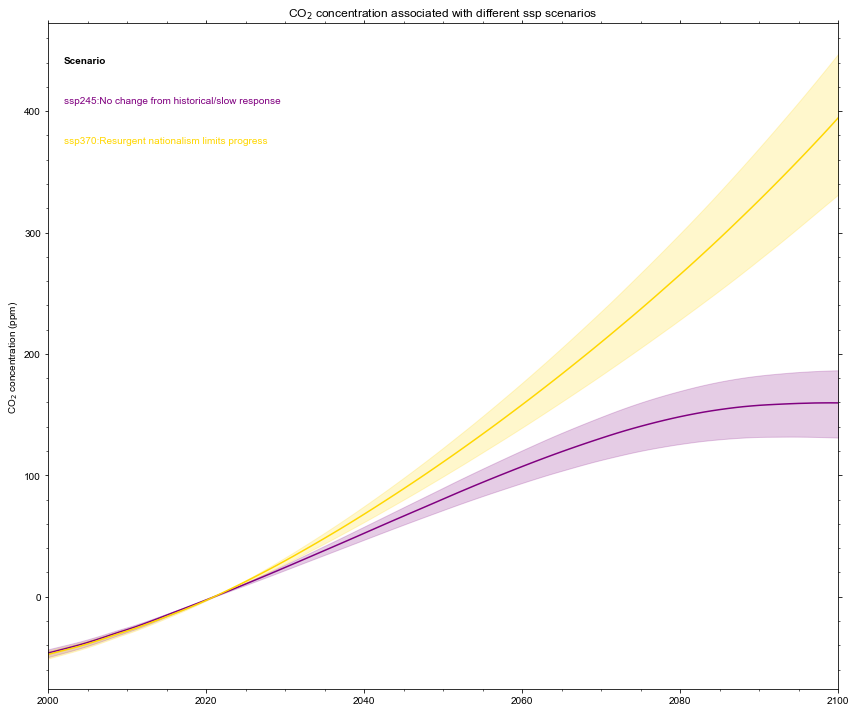

In [31]:
fig, ax = pl.subplots(figsize=(12, 10))

ax.text(0.02, 0.94, 'Scenario', fontweight='bold', fontsize=10, transform=ax.transAxes)
for i, scenario in enumerate(['ssp245', 'ssp370']):
    #possible scenarios ['ssp119', 'ssp126', 'ssp245', 'ssp370','ssp434','ssp585']:
    ax.fill_between(np.arange(2000,2101), np.percentile(results_out[scenario]['co2_conc'][250:351,:] - results_out[scenario]['co2_conc'][271,:], 5, axis=1), np.percentile(results_out[scenario]['co2_conc'][250:351,:] - results_out[scenario]['co2_conc'][271,:], 95, axis=1), color=colors[scenario], alpha=0.2)
    ax.plot(np.arange(2000, 2101), np.median(results_out[scenario]['co2_conc'][250:351,:] - results_out[scenario]['co2_conc'][271,:], axis=1), color=colors[scenario], label=labels[scenario])
    ax.text(0.02, 0.88-0.06*i, labels[scenario], color=colors[scenario], transform=ax.transAxes, fontsize=10)
#ax.legend(fontsize=10);
ax.set_ylabel(r'CO${_2}$ concentration (ppm)');
ax.set_title(r'CO${_2}$ concentration associated with different ssp scenarios');
ax.set_xlim(2000, 2100)
#ax.set_ylim(-0.5, 1.5)

from matplotlib import ticker


ax1.yaxis.set_major_locator(ticker.FixedLocator(positions))

ax1.spines['right'].set_color('gray')
ax1.tick_params(axis='y', colors='gray')

fig.tight_layout()
pl.savefig('../plots/rcmip_245_370_scenarios_CO2conc.png', dpi=500, transparent=False)

# All on the same plot ERF!

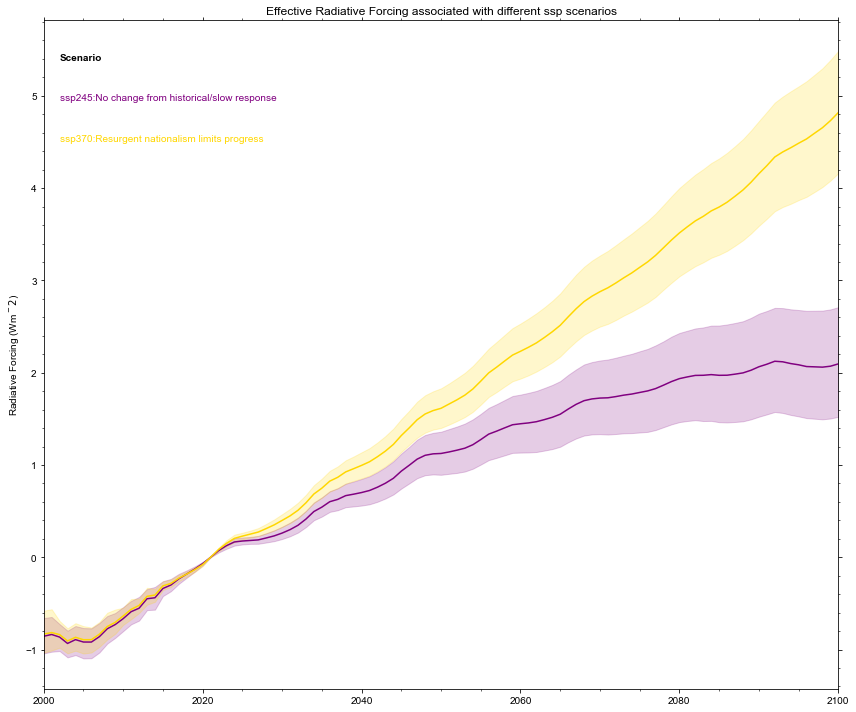

In [32]:
fig, ax = pl.subplots(figsize=(12, 10))

ax.text(0.02, 0.94, 'Scenario', fontweight='bold', fontsize=10, transform=ax.transAxes)
for i, scenario in enumerate(['ssp245', 'ssp370']):
    #if scenario in ['ssp119', 'ssp245', 'ssp434']:
    #'ssp119', 'ssp126', 'ssp245', 'ssp370','ssp434','ssp585'
    ax.fill_between(np.arange(2000,2101), np.percentile(results_out[scenario]['F_tot'][250:351,:] - results_out[scenario]['F_tot'][271,:], 5, axis=1), np.percentile(results_out[scenario]['F_tot'][250:351,:] - results_out[scenario]['F_tot'][271,:], 95, axis=1), color=colors[scenario], alpha=0.2)
    ax.plot(np.arange(2000, 2101), np.median(results_out[scenario]['F_tot'][250:351,:] - results_out[scenario]['F_tot'][271,:], axis=1), color=colors[scenario], label=labels[scenario])
    ax.text(0.02, 0.88-0.06*i, labels[scenario], color=colors[scenario], transform=ax.transAxes, fontsize=10)
#ax.legend(fontsize=10);
ax.set_ylabel(r'Radiative Forcing (Wm${^-2}$)');
ax.set_title('Effective Radiative Forcing associated with different ssp scenarios');
ax.set_xlim(2000, 2100)
#ax.set_ylim(-0.5, 1.5)

from matplotlib import ticker


ax1.yaxis.set_major_locator(ticker.FixedLocator(positions))

ax1.spines['right'].set_color('gray')
ax1.tick_params(axis='y', colors='gray')

fig.tight_layout()
pl.savefig('../plots/rcmip_245_370_scenarios_erf.png', dpi=500, transparent=False)